# **Rasool's Marketing Mix Model (R3M)©** <br> for Incrementality Analysis Ver. 2.01
Last updated: 5-29-2025

---

## Model built and maintained by:<br>
### <b>Asif Rasool, Ph.D.</b>

Research Economist<br>
Business Research Center <br>
Southeastern Louisiana University<br>
1514 Martens Drive, Hammond, LA 70401<br>
Phone: 985-549-3831<br>
Email: [asif.rasool@southeastern.edu](https://)


---


In [ ]:
# Clone your full MMM repo so your notebook, data, and outputs come along
!git clone https://github.com/Asif-Rasool/MMM.git
%cd MMM
# Install the required packages
!pip install -r requirements.txt    


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
  https://colab.research.google.com/github/Asif-Rasool/MMM/blob/main/main.ipynb
)


# Data cleaning and preprocessing

In [3]:
import pandas as pd
import numpy as np

def clean_campaign_data(df):
    """
    Cleans the Campaign-Data.csv DataFrame by:
      - Normalizing column names
      - Stripping commas/dashes from numeric fields
      - Parsing dates
      - Creating a binary ‘Visit’ outcome
    """
    df_clean = df.copy()

    # 1) Normalize column names
    df_clean.columns = (
        df_clean.columns
        .str.strip()
        .str.replace(" ", "_", regex=False)
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
    )

    # 2) Numeric cleanup: remove commas, convert '-' to NaN
    cols_to_clean = [
        'Amount_Collected','Unit Sold','Campaign (Email)', 'Campaign_Flyer','Campaign (Phone)','Facebook',
          'Instagram', 'YouTube', 'TikTok'
          ]
    for col in cols_to_clean:
        if col in df_clean.columns:
            df_clean[col] = (
                df_clean[col]
                .astype(str)
                .str.replace(",", "", regex=False)
                .str.strip()
                .replace("-", np.nan)
                .astype(float)
            )

    # 3) Parse the date
    df_clean['Calendardate'] = pd.to_datetime(df_clean['Calendardate'], format='%d-%m-%Y')

    # 4) Create binary outcome
    df_clean['Visit'] = (df_clean['Unit_Sold'] > 0).astype(int)

    return df_clean

# —————— USAGE ——————
# Point this to where your file actually lives:
path = "Data/Campaign-Data.csv"
df = pd.read_csv(path)

# Clean it
df_cleaned = clean_campaign_data(df)

# Quick sanity check
print(df_cleaned.dtypes)
print(df_cleaned.head())


Client_ID                        object
Client_Type                      object
Number_of_Customers               int64
Monthly_Target                    int64
Zip_Code                          int64
Calendardate             datetime64[ns]
Amount_Collected                float64
Unit_Sold                         int64
Campaign_Email                    int64
Campaign_Flyer                  float64
Campaign_Phone                    int64
Facebook                        float64
Instagram                       float64
YouTube                         float64
TikTok                          float64
LinkedIn                          int64
Number_of_Competition            object
Visit                             int32
dtype: object
   Client_ID      Client_Type  Number_of_Customers  Monthly_Target  Zip_Code  \
0  ID-987275  Medium Facility                 2800             125      1003   
1  ID-987275  Medium Facility                 2800             125      1003   
2  ID-987275  Medium Facil

In [4]:
df_cleaned.head()

,Client_ID,Client_Type,Number_of_Customers,Monthly_Target,Zip_Code,Calendardate,Amount_Collected,Unit_Sold,Campaign_Email,Campaign_Flyer,Campaign_Phone,Facebook,Instagram,YouTube,TikTok,LinkedIn,Number_of_Competition,Visit
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,NaN,0,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,0
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460.0,24,0,0.0,0,0.0,0.0,0.0,0.0,322500,Low,1
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384.0,75,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,1
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304.0,123,0,0.0,0,0.0,3547500.0,1290000.0,0.0,0,Low,1
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224.0,171,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,1


# Feature Engineering

In [5]:
## Creation of Additional Features
df_cleaned['Calendardate']=pd.to_datetime(df_cleaned['Calendardate'])
df_cleaned['Calendar_Month']=df_cleaned['Calendardate'].dt.month
df_cleaned['Calendar_Year']=df_cleaned['Calendardate'].dt.year

# Correlation Analysis

In [6]:
# Select only numeric features for correlation calculation
numeric_data = df_cleaned.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_with_amount_collected = correlation_matrix[['Amount_Collected']]

# Print or display the results
print(correlation_with_amount_collected)


                     Amount_Collected
Number_of_Customers          0.535321
Monthly_Target               0.523661
Zip_Code                          NaN
Amount_Collected             1.000000
Unit_Sold                    0.996489
Campaign_Email               0.217570
Campaign_Flyer               0.370987
Campaign_Phone              -0.002421
Facebook                     0.265893
Instagram                    0.474523
YouTube                      0.231210
TikTok                       0.218170
LinkedIn                     0.060565
Visit                        0.095042
Calendar_Month               0.079363
Calendar_Year                0.240905


In [7]:
import seaborn as sns
import pandas as pd

# Set color map
cm = sns.light_palette("green", as_cmap=True)

# Compute correlation with 'Amount_Collected'
correlation_analysis = pd.DataFrame(
    df_cleaned[['Amount_Collected',
          'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
          'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']].corr()['Amount_Collected']
).reset_index()

# Rename columns for clarity
correlation_analysis.columns = ['Impacting Variable', 'Degree of Linear Impact (Correlation)']

# Remove self-correlation
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount_Collected']

# Sort by correlation strength
correlation_analysis = correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)

# Style and display
correlation_analysis.style.background_gradient(cmap=cm).format(precision=2)


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Instagram,0.47
2,Campaign_Flyer,0.37
4,Facebook,0.27
6,YouTube,0.23
7,TikTok,0.22
1,Campaign_Email,0.22
8,LinkedIn,0.06
3,Campaign_Phone,-0.00


In [8]:
import seaborn as sns
import pandas as pd

# Green color map
cm = sns.light_palette("green", as_cmap=True)

# Grouped correlation with Amount_Collected by Client_Type
correlation_analysis = pd.DataFrame(
    df_cleaned.groupby('Client_Type')[[
        'Amount_Collected',
        'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
        'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn'
    ]].corr()['Amount_Collected']
).reset_index()

# Clean up and reformat
correlation_analysis = correlation_analysis.sort_values(
    ['Client_Type', 'Amount_Collected'], ascending=False
)
correlation_analysis.columns = ['Client Type', 'Variable Impact on Sales', 'Impact']
correlation_analysis = correlation_analysis[
    correlation_analysis['Variable Impact on Sales'] != 'Amount_Collected'
].reset_index(drop=True)

# Style table
correlation_analysis.style.background_gradient(cmap=cm).format({'Impact': "{:.2f}"})


,Client Type,Variable Impact on Sales,Impact
0,Small Facility,Campaign_Email,0.20
1,Small Facility,Instagram,0.14
2,Small Facility,Campaign_Flyer,0.01
3,Small Facility,YouTube,-0.04
4,Small Facility,Facebook,-0.05
5,Small Facility,TikTok,-0.06
6,Small Facility,LinkedIn,-0.06
7,Small Facility,Campaign_Phone,nan
8,Private Facility,Instagram,0.43
9,Private Facility,Campaign_Flyer,0.07


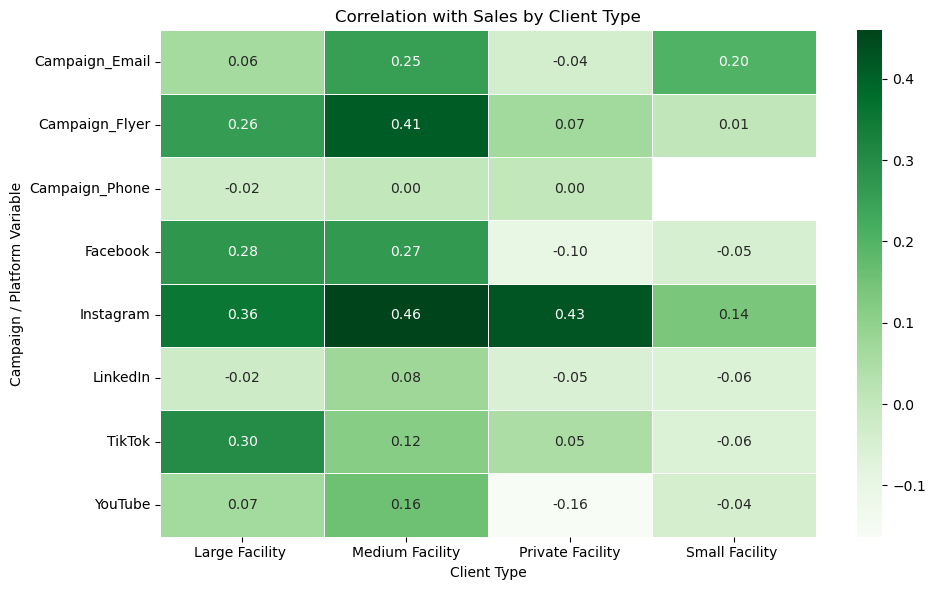

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare correlation matrix again (if not already done)
correlation_analysis = pd.DataFrame(
    df_cleaned.groupby('Client_Type')[[
        'Amount_Collected',
        'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
        'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn'
    ]].corr()['Amount_Collected']
).reset_index()

# Filter out self-correlation
correlation_analysis = correlation_analysis[
    correlation_analysis['level_1'] != 'Amount_Collected'
]

# Rename columns for clarity
correlation_analysis.columns = ['Client_Type', 'Variable', 'Correlation']

# Pivot for heatmap
heatmap_data = correlation_analysis.pivot(index='Variable', columns='Client_Type', values='Correlation')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Sales by Client Type")
plt.xlabel("Client Type")
plt.ylabel("Campaign / Platform Variable")
plt.tight_layout()
plt.savefig("Figures/segmented_correlation_heatmap.png")
plt.show()


# Regression Analysis

## Pooled Linear Model

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import pandas as pd

# Clean column names
df_cleaned.columns = (
    df_cleaned.columns.str.replace(" ", "_")
                        .str.replace("(", "")
                        .str.replace(")", "")
)

# Define variables
campaign_vars = ['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone']
platform_vars = ['Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']
all_vars = campaign_vars + platform_vars

# Create all pairwise interaction terms
interaction_terms = [f"{a}:{b}" for a, b in combinations(all_vars, 2)]

# Build formula
formula = 'Amount_Collected ~ ' + ' + '.join(all_vars + interaction_terms)

# Fit the model
results = smf.ols(formula=formula, data=df_cleaned.dropna()).fit()

# Print full model summary
print(results.summary())

# Optional: Filtered summary for only statistically significant variables
sig_mask = (results.pvalues < 0.05) & (results.pvalues.index != 'Intercept')
filtered_summary = pd.DataFrame({
    'Variable': results.params[sig_mask].index,
    'Coefficient (Impact)': results.params[sig_mask].values,
    'P-Value': results.pvalues[sig_mask].values
}).sort_values('Coefficient (Impact)', ascending=False)

print("\nFiltered summary (p < 0.05):")
print(filtered_summary)
with open("Outputs/pooled_model_ols_summary.txt", "w") as f:
    f.write(results.summary().as_text())




                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     33.73
Date:                Thu, 29 May 2025   Prob (F-statistic):          1.16e-165
Time:                        10:45:44   Log-Likelihood:                -28588.
No. Observations:                1545   AIC:                         5.725e+04
Df Residuals:                    1508   BIC:                         5.745e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [11]:
# Extract key OLS summary stats
summary_stats = {
    "R-squared": results.rsquared,
    "Adj. R-squared": results.rsquared_adj,
    "F-statistic": results.fvalue,
    "Prob (F-statistic)": results.f_pvalue,
    "No. Observations": int(results.nobs),
    "AIC": results.aic,
    "BIC": results.bic
}

# Save to CSV (or JSON if you prefer)
pd.DataFrame.from_dict(summary_stats, orient='index', columns=["Value"]).to_csv("Outputs/pooled_model_stats.csv")


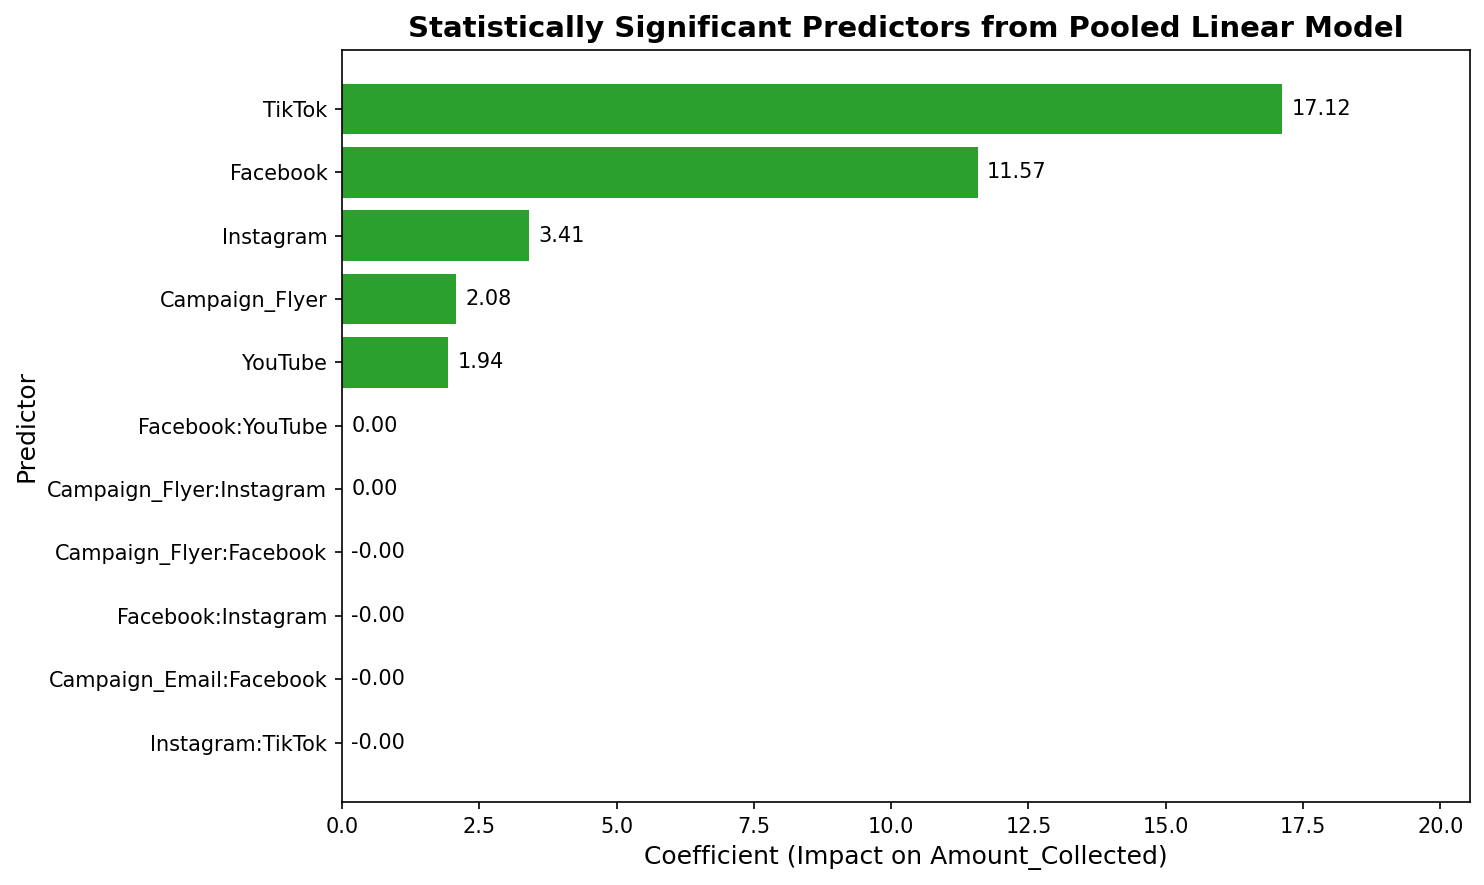

In [12]:
import matplotlib.pyplot as plt

# Sort by coefficient
filtered_summary_sorted = filtered_summary.sort_values("Coefficient (Impact)")

# Create figure
plt.figure(figsize=(10, 6), dpi=150)

bars = plt.barh(
    filtered_summary_sorted["Variable"],
    filtered_summary_sorted["Coefficient (Impact)"],
    color="#2ca02c"
)

# Determine the max coefficient to set the xlim with padding
max_val = filtered_summary_sorted["Coefficient (Impact)"].max()
plt.xlim(0, max_val * 1.2)  # 20% padding on right

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_val * 0.01,  # slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        va='center',
        fontsize=10
    )

# Labels and title
plt.xlabel("Coefficient (Impact on Amount_Collected)", fontsize=12)
plt.ylabel("Predictor", fontsize=12)
plt.title("Statistically Significant Predictors from Pooled Linear Model", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("Figures/pooled_model_significant_predictors_clean.png", bbox_inches="tight")
plt.show()


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from itertools import combinations

consolidated_summary = pd.DataFrame()

# Define regressors
campaign_vars = ['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone']
platform_vars = ['Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']
all_vars = campaign_vars + platform_vars
interaction_terms = [f"{a}:{b}" for a, b in combinations(all_vars, 2)]

# Build full regression formula
formula = 'Amount_Collected ~ ' + ' + '.join(all_vars + interaction_terms)

# Loop over client types
for acctype in df_cleaned['Client_Type'].unique():
    print(acctype)
    temp_data = df_cleaned[df_cleaned['Client_Type'] == acctype].dropna().copy()

    # Run OLS model
    try:
        results = smf.ols(formula=formula, data=temp_data).fit()

        # Extract significant variables
        coef_series = results.params
        pval_series = results.pvalues
        sig_mask = (pval_series < 0.05) & (coef_series.index != 'Intercept')
        sig_vars = coef_series[sig_mask]

        if sig_vars.empty:
            print("No significant predictors.")
            continue

        df = pd.DataFrame({
            'Variable': sig_vars.index,
            'Coefficient (Impact)': sig_vars.values
        })
        df['Account Type'] = acctype
        df = df.sort_values('Coefficient (Impact)', ascending=False)

        consolidated_summary = pd.concat([consolidated_summary, df], ignore_index=True)

        print(results.summary())

    except Exception as e:
        print(f"Regression failed for {acctype}: {e}")


Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     8.998
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.47e-31
Time:                        10:45:44   Log-Likelihood:                -7770.4
No. Observations:                 414   AIC:                         1.561e+04
Df Residuals:                     379   BIC:                         1.575e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Segment-specific Linear Model

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from itertools import combinations
import os

# Create output folder
os.makedirs("Outputs", exist_ok=True)

# Define variables
campaign_vars = ['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone']
platform_vars = ['Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']
all_vars = campaign_vars + platform_vars
interaction_terms = [f"{a}:{b}" for a, b in combinations(all_vars, 2)]

# Regression formula
formula = 'Amount_Collected ~ ' + ' + '.join(all_vars + interaction_terms)

# Combined summary DataFrame
consolidated_summary = pd.DataFrame()

# Loop through client types
for acctype in df_cleaned['Client_Type'].unique():
    temp_data = df_cleaned[df_cleaned['Client_Type'] == acctype].dropna().copy()
    print(f"\n📊 Segment: {acctype}")

    try:
        results = smf.ols(formula=formula, data=temp_data).fit()

        # Show regression summary (standard OLS output)
        print(results.summary())

        # Filter for significant predictors
        sig_mask = (results.pvalues < 0.05) & (results.params.index != 'Intercept')
        sig_vars = results.params[sig_mask]

        if not sig_vars.empty:
            df = pd.DataFrame({
                'Variable': sig_vars.index,
                'Coefficient (Impact)': sig_vars.values,
                'P-Value': results.pvalues[sig_mask].values
            })
            df['Client Type'] = acctype
            df = df.sort_values('Coefficient (Impact)', ascending=False)

            # Show filtered table in notebook
            display(df)

            # Save filtered table
            df.to_csv(f"Outputs/{acctype.replace(' ', '_')}_summary.csv", index=False)

            # Add to consolidated
            consolidated_summary = pd.concat([consolidated_summary, df], ignore_index=True)
        else:
            print("No statistically significant predictors found.")

        # Save OLS text summary
        with open(f"Outputs/{acctype.replace(' ', '_')}_ols_summary.txt", "w") as f:
            f.write(results.summary().as_text())

    except Exception as e:
        print(f"❌ Regression failed for {acctype}: {e}")



📊 Segment: Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     8.998
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.47e-31
Time:                        10:45:45   Log-Likelihood:                -7770.4
No. Observations:                 414   AIC:                         1.561e+04
Df Residuals:                     379   BIC:                         1.575e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

,Variable,Coefficient (Impact),P-Value,Client Type
1,Facebook,1.150361e+01,8.106082e-04,Medium Facility
7,Campaign_Phone:Facebook,4.531875e+00,1.263017e-02,Medium Facility
2,Instagram,3.362406e+00,3.392976e-10,Medium Facility
3,YouTube,2.460405e+00,2.899506e-07,Medium Facility
5,Campaign_Flyer:Campaign_Phone,5.476906e-03,1.257208e-02,Medium Facility
8,Campaign_Phone:Instagram,2.900088e-03,1.266913e-02,Medium Facility
9,Campaign_Phone:YouTube,1.882066e-03,1.260720e-02,Medium Facility
13,Facebook:YouTube,2.942487e-06,2.691054e-04,Medium Facility
6,Campaign_Flyer:Facebook,-5.080937e-07,3.626289e-02,Medium Facility
12,Facebook:Instagram,-6.555827e-07,2.404282e-02,Medium Facility



📊 Segment: Large Facility 
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     16.56
Date:                Thu, 29 May 2025   Prob (F-statistic):           9.01e-74
Time:                        10:45:45   Log-Likelihood:                -16466.
No. Observations:                 897   AIC:                         3.300e+04
Df Residuals:                     861   BIC:                         3.318e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

,Variable,Coefficient (Impact),P-Value,Client Type
3,TikTok,1.711764e+01,3.686368e-10,Large Facility
1,Facebook,6.645856e+00,1.634866e-02,Large Facility
2,Instagram,2.903804e+00,3.581402e-14,Large Facility
0,Campaign_Flyer,2.160853e+00,1.090756e-02,Large Facility
6,Campaign_Flyer:Facebook,3.516715e-06,3.653903e-03,Large Facility
7,Facebook:YouTube,3.089825e-06,2.130907e-02,Large Facility
8,Instagram:YouTube,6.661366e-07,9.996716e-08,Large Facility
4,Campaign_Email:Campaign_Flyer,-8.956920e-07,4.239450e-02,Large Facility
5,Campaign_Flyer:Campaign_Phone,-2.829924e-06,1.345466e-02,Large Facility



📊 Segment: Small Facility 
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.9176
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.546
Time:                        10:45:45   Log-Likelihood:                -2893.0
No. Observations:                 167   AIC:                             5818.
Df Residuals:                     151   BIC:                             5868.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

,Variable,Coefficient (Impact),P-Value,Client Type
5,Campaign_Email:Campaign_Phone,158.610073,2.019077e-13,Small Facility
6,Campaign_Email:Facebook,62.732787,2.019077e-13,Small Facility
13,Campaign_Flyer:LinkedIn,51.632593,2.019013e-13,Small Facility
12,Campaign_Flyer:TikTok,29.239367,2.018964e-13,Small Facility
7,Campaign_Email:Instagram,15.825228,2.019050e-13,Small Facility
19,TikTok:LinkedIn,12.291860,2.019024e-13,Small Facility
18,YouTube:LinkedIn,10.941376,2.019228e-13,Small Facility
15,Facebook:YouTube,0.694803,2.013397e-13,Small Facility
8,Campaign_Email:YouTube,0.001185,1.181628e-13,Small Facility
11,Campaign_Flyer:Campaign_Phone,0.001086,2.019077e-13,Small Facility



📊 Segment: Private Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     2.827
Date:                Thu, 29 May 2025   Prob (F-statistic):            0.00289
Time:                        10:45:45   Log-Likelihood:                -1202.3
No. Observations:                  67   AIC:                             2437.
Df Residuals:                      51   BIC:                             2472.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

,Variable,Coefficient (Impact),P-Value,Client Type
0,Instagram,13.945152,0.000001,Private Facility
1,Campaign_Flyer:Instagram,-0.000004,0.035814,Private Facility
2,Instagram:YouTube,-0.000005,0.002878,Private Facility


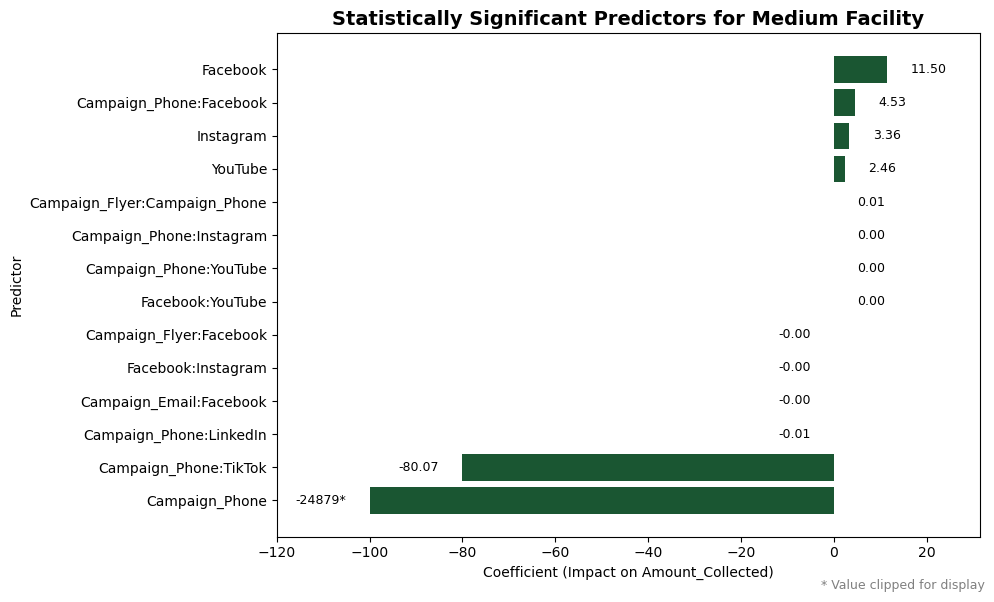

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_medium = pd.read_csv("Outputs/Medium_Facility_summary.csv")
df_medium = df_medium.sort_values("Coefficient (Impact)", ascending=True).reset_index(drop=True)

# Define clipping range
clip_threshold = 100
df_medium["Visual Coefficient"] = df_medium["Coefficient (Impact)"].clip(-clip_threshold, clip_threshold)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_medium["Variable"], df_medium["Visual Coefficient"], color="#1A5632")

# Annotate
for bar, true_val, vis_val in zip(bars, df_medium["Coefficient (Impact)"], df_medium["Visual Coefficient"]):
    label = f"{true_val:.2f}" if abs(true_val) <= clip_threshold else f"{true_val:.0f}*"
    offset = 5 if vis_val >= 0 else -5  # Increased offset
    align = "left" if vis_val >= 0 else "right"
    xpos = vis_val + offset
    ax.text(xpos, bar.get_y() + bar.get_height()/2, label,
            va="center", ha=align, fontsize=9, color="black")

# Adjust limits to ensure labels don’t clip
ax.set_xlim(min(df_medium["Visual Coefficient"]) - 20, max(df_medium["Visual Coefficient"]) + 20)

# Labels and title
ax.set_title("Statistically Significant Predictors for Medium Facility", fontsize=14, fontweight="bold")
ax.set_xlabel("Coefficient (Impact on Amount_Collected)")
ax.set_ylabel("Predictor")

# Footnote
plt.figtext(0.99, 0.01, "* Value clipped for display", ha="right", fontsize=9, color="gray")

# Save
plt.tight_layout()
plt.savefig("Figures/Medium_Facility_Coefficient_Barplot_Capped.png", dpi=300)
plt.show()


# Random Forest Regression

## Pooled Random Forest

In [16]:
# ── Imports ──
import os, json
import pandas as pd
import numpy as np
import joblib
from itertools import combinations

from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics         import mean_squared_error, r2_score

# ── Prep Outputs folder ──
os.makedirs('Outputs', exist_ok=True)

# ── 1) Load & clean column names ──
df = pd.read_csv('Data/Campaign-Data.csv')
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'\s+', '_', regex=True)
      .str.replace(r'[^\w_]', '', regex=True)
)

# ── 2) Clean your target ──
df['amount_collected'] = (
    df['amount_collected']
      .replace(r'[^\d\.]', '', regex=True)     # remove anything but digits & dot
      .pipe(pd.to_numeric, errors='coerce')    # convert to float, NaN if invalid
)
df = df.dropna(subset=['amount_collected'])

# ── 3) Drop non-numeric columns ──
to_drop = ['client_id', 'number_of_competition'] \
        + [c for c in df.columns if 'date' in c]   # catches calendardate
df = df.drop(columns=to_drop)

# ── 4) Define your 8 base predictors ──
base_feats = [
    'campaign_email',
    'campaign_flyer',
    'campaign_phone',
    'facebook',
    'instagram',
    'youtube',
    'tiktok',
    'linkedin'
]

# ── 5) Generate all pairwise interaction terms ──
inter_feats = []
for a, b in combinations(base_feats, 2):
    name = f"{a}_x_{b}"
    df[name] = df[a] * df[b]
    inter_feats.append(name)

# ── 6) Assemble X and y ──
features = base_feats + inter_feats
X = df[features]
y = df['amount_collected']

# ── 7) Train/test split ──
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ── 8) Fit Random Forest ──
rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ── 9) Evaluate ──
y_pred = rf.predict(X_test)
metrics = {
    'rmse':      float(np.sqrt(mean_squared_error(y_test, y_pred))),
    'r2':        float(r2_score(y_test, y_pred)),
    'cv_scores': [float(s) for s in cross_val_score(
                      rf, X_train, y_train,
                      cv=5, scoring='r2', n_jobs=-1
                  )]
}
metrics['avg_cv_r2'] = float(np.mean(metrics['cv_scores']))

# ── 10) Export artifacts to Outputs/ ──
with open('Outputs/rf_metrics.json','w') as f:
    json.dump(metrics, f, indent=2)

feat_imp = (
    pd.Series(rf.feature_importances_, index=features)
      .sort_values(ascending=False)
      .reset_index()
)
feat_imp.columns = ['feature','importance']
feat_imp.to_csv('Outputs/feature_importance.csv', index=False)

pd.DataFrame({
    'actual':    y_test,
    'predicted': y_pred
}).to_csv('Outputs/pred_vs_actual.csv', index=False)

joblib.dump(rf, 'Outputs/rf_campaign_model.pkl')

print("✅ Trained RF on same features as OLS (8 channels + 28 interactions)")
print("✅ Artifacts written to Outputs/:", os.listdir('Outputs'))


✅ Trained RF on same features as OLS (8 channels + 28 interactions)
✅ Artifacts written to Outputs/: ['feature_importance.csv', 'Large_Facility_summary.csv', 'Large_Facility_summary.xlsx', 'Large_Facility__ols.json', 'Large_Facility__ols_summary.txt', 'Large_Facility__rf.json', 'Large_Facility__summary.csv', 'Medium_Facility_ols.json', 'Medium_Facility_ols_summary.txt', 'Medium_Facility_rf.json', 'Medium_Facility_summary.csv', 'ols_eval.json', 'pooled_model_ols_summary.txt', 'pooled_model_stats.csv', 'pooled_model_summary.csv', 'pred_vs_actual.csv', 'Private_Facility_ols.json', 'Private_Facility_ols_summary.txt', 'Private_Facility_rf.json', 'Private_Facility_summary.csv', 'rf_campaign_model.pkl', 'rf_eval.json', 'rf_eval_Large_Facility_.json', 'rf_eval_Medium_Facility.json', 'rf_eval_Private_Facility.json', 'rf_eval_Small_Facility_.json', 'rf_marginals.json', 'rf_marginals_full.json', 'rf_metrics.json', 'segments', 'Small_Facility__ols.json', 'Small_Facility__ols_summary.txt', 'Small_F

## 🔑 Model Performance Metrics

- Test RMSE:       29103805.196
- Test R²:         0.368
- 5-fold CV R²:    0.344, 0.430, 0.421, 0.424, 0.464
- Average CV R²:   0.417


### 📊 Feature Importances

,feature,importance
0,campaign_flyer_x_instagram,0.296350
1,instagram,0.153705
2,instagram_x_youtube,0.133044
3,youtube,0.086183
4,facebook_x_instagram,0.057374
5,facebook_x_tiktok,0.047666
6,campaign_flyer,0.034168
7,campaign_flyer_x_youtube,0.032788
8,campaign_flyer_x_facebook,0.028711
9,facebook,0.027942


### 🔍 Sample Predictions vs. Actuals

,actual,predicted
0,23866224.0,1.107061e+07
1,6818920.0,2.450912e+07
2,13637844.0,6.424471e+06
3,3409460.0,6.930468e+06
4,34094608.0,3.992182e+07


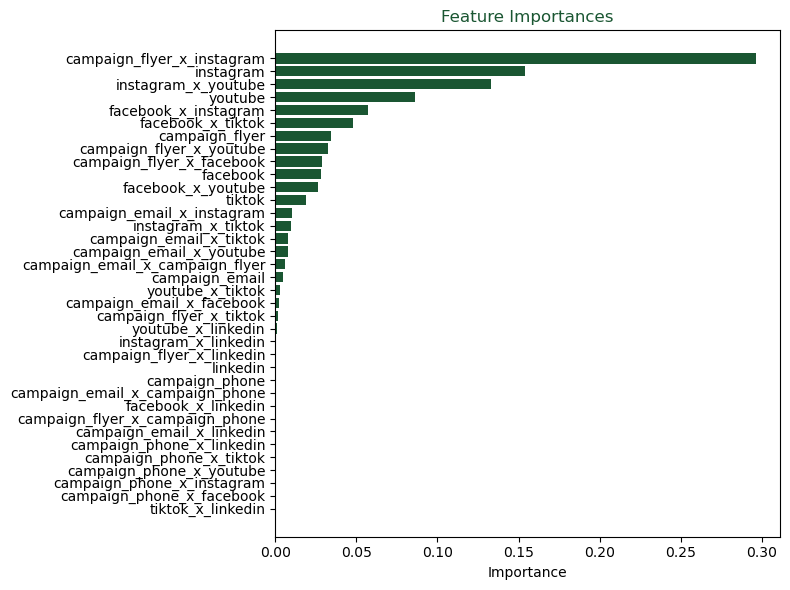

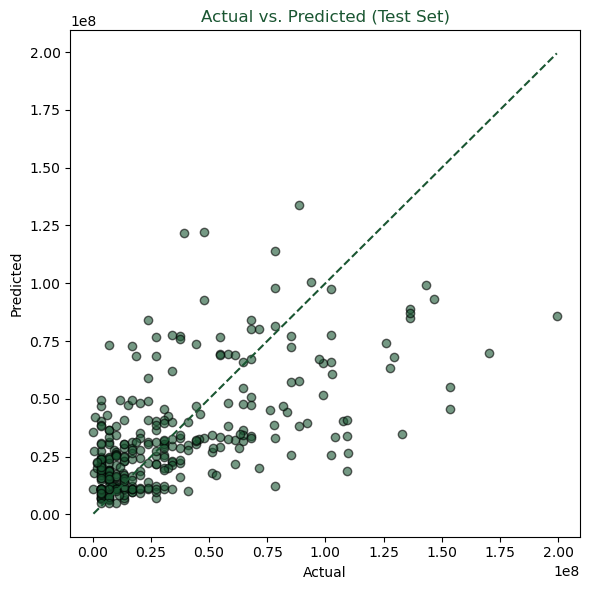

### 🔍 Predictions vs. Actuals (Full Table)

,actual,predicted
0,23866224.0,1.107061e+07
1,6818920.0,2.450912e+07
2,13637844.0,6.424471e+06
3,3409460.0,6.930468e+06
4,34094608.0,3.992182e+07
...,...,...
304,81827056.0,4.694377e+07
305,6818920.0,4.776213e+06
306,1704732.0,2.255444e+07
307,54551372.0,3.349333e+07


In [17]:
# ── RESULTS DASHBOARD (Jupyter) ──

import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Southeastern brand green
brand_green = "#1A5632"

# 1) Load artifacts
metrics = json.load(open("Outputs/rf_metrics.json"))
fi      = pd.read_csv("Outputs/feature_importance.csv")
preds   = pd.read_csv("Outputs/pred_vs_actual.csv")

# 2) Show key metrics
display(Markdown("## 🔑 Model Performance Metrics"))
print(f"- Test RMSE:       {metrics['rmse']:.3f}")
print(f"- Test R²:         {metrics['r2']:.3f}")
print(f"- 5-fold CV R²:    {', '.join(f'{v:.3f}' for v in metrics['cv_scores'])}")
print(f"- Average CV R²:   {metrics['avg_cv_r2']:.3f}")

# 3) Show Feature Importances table (raw)
display(Markdown("### 📊 Feature Importances"))
display(fi)

# 4) Show sample of Predictions vs. Actuals (raw)
display(Markdown("### 🔍 Sample Predictions vs. Actuals"))
display(preds.head())

# 5) Plot Feature Importances in green
plt.figure(figsize=(8,6))
plt.barh(fi["feature"], fi["importance"], color=brand_green)
plt.gca().invert_yaxis()
plt.title("Feature Importances", color=brand_green)
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 6) Plot Actual vs. Predicted in green
plt.figure(figsize=(6,6))
plt.scatter(preds["actual"], preds["predicted"], color=brand_green, alpha=0.6, edgecolor='k')
mn, mx = preds[["actual","predicted"]].min().min(), preds[["actual","predicted"]].max().max()
plt.plot([mn, mx], [mn, mx], linestyle="--", color=brand_green)
plt.title("Actual vs. Predicted (Test Set)", color=brand_green)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# 7) Show full Predictions vs. Actuals table at the bottom
display(Markdown("### 🔍 Predictions vs. Actuals (Full Table)"))
display(preds)


In [18]:
import json
import numpy as np

# 1) Re‐assemble all features (base + pairwise interactions)
base_feats = [
    'campaign_email','campaign_flyer','campaign_phone',
    'facebook','instagram','youtube','tiktok','linkedin'
]
from itertools import combinations
inter_feats = [f"{a}_x_{b}" for a,b in combinations(base_feats,2)]
all_feats = base_feats + inter_feats

# 2) Baseline predictions
baseline = rf.predict(X_test)

# 3) Finite‐difference loop
marginals = {}
for feat in all_feats:
    Xb = X_test.copy()
    Xb[feat] = Xb[feat] + 1
    inc = rf.predict(Xb)
    marginals[feat] = float(np.mean(inc - baseline))

# 4) Save out to JSON
with open('Outputs/rf_marginals_full.json','w') as f:
    json.dump(marginals, f, indent=2)

print("Saved rf_marginals_full.json with entries:", len(marginals))


Saved rf_marginals_full.json with entries: 36


# Segment-Specific Random Forests

In [19]:
# ── 5.4 Segment-Specific Random Forests ──

import os, json
import numpy as np
import pandas as pd
import joblib

from itertools import combinations
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics         import mean_squared_error, r2_score

# 1) Load & clean data
raw = pd.read_csv("Data/Campaign-Data.csv")
raw.columns = (
    raw.columns
       .str.strip()
       .str.lower()
       .str.replace(r"\s+", "_", regex=True)
       .str.replace(r"[^\w_]", "", regex=True)
)
raw["amount_collected"] = (
    raw["amount_collected"]
       .replace(r"[^\d\.]", "", regex=True)
       .pipe(pd.to_numeric, errors="coerce")
)
raw = raw.dropna(subset=["amount_collected"])

# 2) Drop IDs/dates & build features
drops = ["client_id","number_of_competition"] + [c for c in raw.columns if "date" in c]
df = raw.drop(columns=drops).copy()

base_feats = [
    "campaign_email","campaign_flyer","campaign_phone",
    "facebook","instagram","youtube","tiktok","linkedin"
]
for a,b in combinations(base_feats, 2):
    df[f"{a}_x_{b}"] = df[a] * df[b]
all_feats = base_feats + [f"{a}_x_{b}" for a,b in combinations(base_feats,2)]

# 3) Make output dir
os.makedirs("Outputs/segments", exist_ok=True)

# 4) Loop through segments
segments = raw["client_type"].str.strip().unique()
for seg in segments:
    seg_clean  = seg.strip()
    safe_seg   = seg_clean.replace(" ", "_")
    mask       = raw["client_type"].str.strip() == seg_clean
    X          = df.loc[mask, all_feats]
    y          = df.loc[mask, "amount_collected"]

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # train RF
    rf = RandomForestRegressor(
        n_estimators=200, min_samples_leaf=5,
        random_state=42, n_jobs=-1
    )
    rf.fit(X_train, y_train)

    # 5) Save metrics
    y_pred = rf.predict(X_test)
    mets = {
        "rmse":      float(np.sqrt(mean_squared_error(y_test, y_pred))),
        "r2":        float(r2_score(y_test, y_pred)),
        "cv_scores":[float(s) for s in cross_val_score(
                         rf, X_train, y_train, cv=5, scoring="r2", n_jobs=-1
                     )]
    }
    mets["avg_cv_r2"] = float(np.mean(mets["cv_scores"]))
    with open(f"Outputs/segments/rf_metrics_{safe_seg}.json","w") as f:
        json.dump(mets, f, indent=2)

    # 6) Save feature importances
    fi = (
        pd.Series(rf.feature_importances_, index=all_feats)
          .sort_values(ascending=False)
          .reset_index()
    )
    fi.columns = ["feature","importance"]
    fi.to_csv(
        f"Outputs/segments/feature_importance_{safe_seg}.csv",
        index=False
    )

    # 7) Save marginal effects
    baseline = rf.predict(X_test)
    marg    = {}
    for feat in all_feats:
        Xb = X_test.copy()
        Xb[feat] += 1
        marg[feat] = float((rf.predict(Xb) - baseline).mean())
    with open(f"Outputs/segments/rf_marginals_{safe_seg}.json","w") as f:
        json.dump(marg, f, indent=2)

    # 8) Persist the model (optional)
    joblib.dump(rf, f"Outputs/segments/rf_model_{safe_seg}.pkl")

    print(f"✓ Finished segment: {seg_clean}")


✓ Finished segment: Medium Facility
✓ Finished segment: Large Facility
✓ Finished segment: Small Facility
✓ Finished segment: Private Facility


## Small Facility Random Forest Results and Interpretation


**Test RMSE:** 6346458  
**Test R²:** -0.370  
**Avg 5-fold CV R²:** -0.092


**Top 5 Feature Importances**

,Feature,Importance
0,Instagram,0.532670
1,Youtube,0.214623
2,Campaign Flyer × Instagram,0.142203
3,Instagram × Youtube,0.076866
4,Campaign Flyer,0.031234


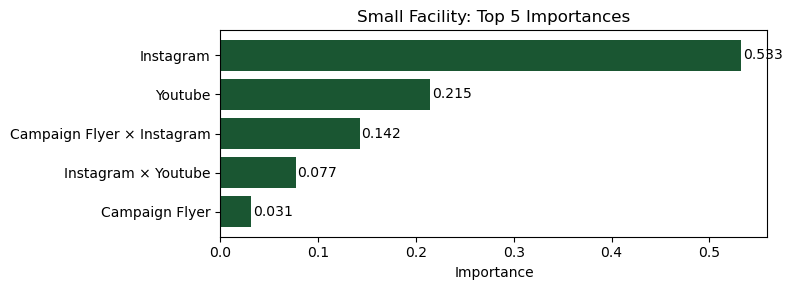

**Marginal Effects (per 1-unit increase)**

,Marginal Effect
Feature,
Campaign Flyer × Facebook,$0.00
Campaign Email × Linkedin,$0.00
Instagram × Tiktok,$0.00
Facebook × Linkedin,$0.00
Campaign Phone × Tiktok,$0.00
Facebook × Youtube,$0.00
Campaign Flyer,$0.00
Campaign Flyer × Tiktok,$0.00
Youtube × Tiktok,$0.00



A one-unit increase in **Campaign Flyer × Facebook** is associated with an average uplift of **$0.00**,  
while a one-unit increase in **Campaign Email × Linkedin** yields about **$0.00**, holding all else constant.


---

## Medium Facility Random Forest Results and Interpretation


**Test RMSE:** 38729247  
**Test R²:** 0.365  
**Avg 5-fold CV R²:** 0.413


**Top 5 Feature Importances**

,Feature,Importance
0,Instagram,0.232565
1,Campaign Flyer × Instagram,0.170327
2,Youtube,0.140268
3,Facebook × Instagram,0.109950
4,Campaign Flyer × Facebook,0.091959


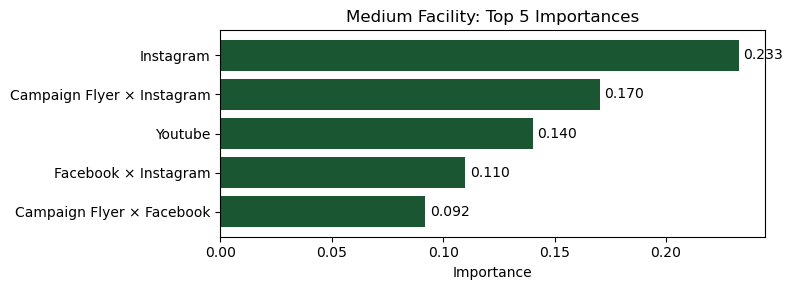

**Marginal Effects (per 1-unit increase)**

,Marginal Effect
Feature,
Instagram,"$208,200.30"
Youtube,"$40,131.31"
Campaign Email × Campaign Phone,$0.00
Campaign Flyer × Instagram,$0.00
Youtube × Linkedin,$0.00
Campaign Phone × Tiktok,$0.00
Facebook × Linkedin,$0.00
Campaign Flyer × Tiktok,$0.00
Campaign Flyer,$0.00



A one-unit increase in **Instagram** is associated with an average uplift of **$208,200.30**,  
while a one-unit increase in **Youtube** yields about **$40,131.31**, holding all else constant.


---

## Private Facility Random Forest Results and Interpretation


**Test RMSE:** 17522766  
**Test R²:** -1.081  
**Avg 5-fold CV R²:** -0.248


**Top 5 Feature Importances**

,Feature,Importance
0,Instagram,0.682872
1,Campaign Flyer,0.123281
2,Campaign Flyer × Instagram,0.103353
3,Youtube,0.047887
4,Instagram × Youtube,0.028303


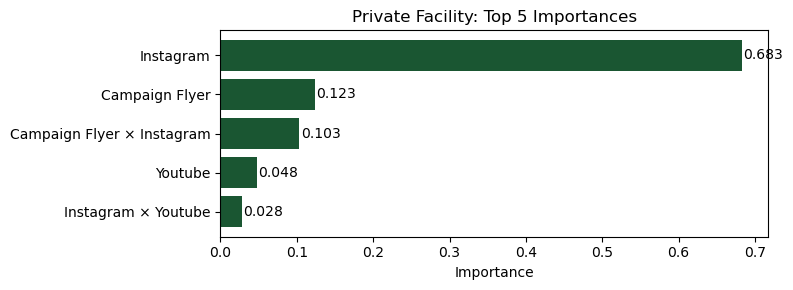

**Marginal Effects (per 1-unit increase)**

,Marginal Effect
Feature,
Tiktok × Linkedin,$0.00
Campaign Flyer × Youtube,$0.00
Tiktok,$0.00
Campaign Flyer × Campaign Phone,$0.00
Youtube × Linkedin,$0.00
Instagram × Youtube,$0.00
Facebook × Tiktok,$0.00
Campaign Phone × Linkedin,$0.00
Facebook × Youtube,$0.00



A one-unit increase in **Tiktok × Linkedin** is associated with an average uplift of **$0.00**,  
while a one-unit increase in **Campaign Flyer × Youtube** yields about **$0.00**, holding all else constant.


---

## Large Facility Random Forest Results and Interpretation


**Test RMSE:** 21835655  
**Test R²:** 0.240  
**Avg 5-fold CV R²:** 0.272


**Top 5 Feature Importances**

,Feature,Importance
0,Instagram,0.258048
1,Instagram × Youtube,0.154532
2,Facebook × Tiktok,0.118925
3,Campaign Flyer × Instagram,0.091979
4,Tiktok,0.084665


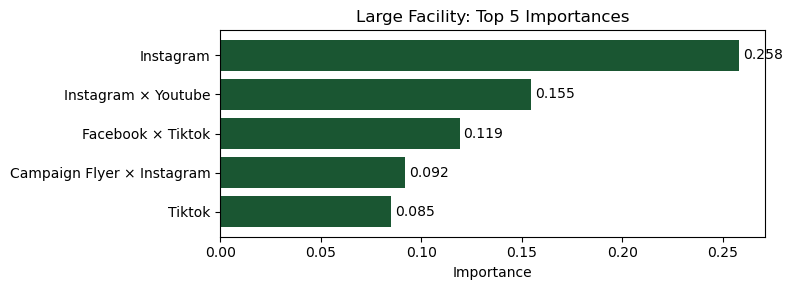

**Marginal Effects (per 1-unit increase)**

,Marginal Effect
Feature,
Youtube,"$35,185.87"
Instagram,"$3,541.15"
Facebook,"$2,931.26"
Campaign Email,"$1,367.99"
Facebook × Linkedin,$0.00
Campaign Phone × Youtube,$0.00
Campaign Flyer × Campaign Phone,$0.00
Campaign Flyer,$0.00
Campaign Flyer × Linkedin,$0.00



A one-unit increase in **Youtube** is associated with an average uplift of **$35,185.87**,  
while a one-unit increase in **Instagram** yields about **$3,541.15**, holding all else constant.


---

In [20]:
# ── Segment‐Specific Random Forest Summaries (Notebook) ──

import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

%matplotlib inline

segments = ["Small Facility", "Medium Facility", "Private Facility", "Large Facility"]

for seg in segments:
    safe_seg = seg.replace(" ", "_")
    display(Markdown(f"## {seg} Random Forest Results and Interpretation"))

    # 1) Metrics
    mets = json.load(open(f"Outputs/segments/rf_metrics_{safe_seg}.json"))
    display(Markdown(f"""
**Test RMSE:** {mets['rmse']:.0f}  
**Test R²:** {mets['r2']:.3f}  
**Avg 5-fold CV R²:** {mets['avg_cv_r2']:.3f}
"""))

    # 2) Top-5 Feature Importances
    fi = (
        pd.read_csv(f"Outputs/segments/feature_importance_{safe_seg}.csv")
          .sort_values("importance", ascending=False)
          .head(5)
    )
    fi["Feature"] = (
        fi["feature"]
          .str.replace("_x_", " × ")
          .str.replace("_", " ")
          .str.title()
    )
    display(Markdown("**Top 5 Feature Importances**"))
    display(
        fi[["Feature","importance"]]
          .rename(columns={"importance":"Importance"})
    )

    # 3) Bar chart
    plt.figure(figsize=(8,3))
    bars = plt.barh(fi["Feature"][::-1], fi["importance"][::-1], color="#1A5632")
    plt.xlabel("Importance")
    plt.title(f"{seg}: Top 5 Importances")
    for bar in bars:
        w = bar.get_width()
        plt.text(w + 0.002, bar.get_y() + bar.get_height()/2, f"{w:.3f}", va="center")
    plt.tight_layout()
    plt.show()

    # 4) **All** Marginal Effects
    marg = json.load(open(f"Outputs/segments/rf_marginals_{safe_seg}.json"))
    dfm = (
        pd.DataFrame.from_dict(marg, orient="index", columns=["Marginal Effect"])
          .sort_values("Marginal Effect", ascending=False)
          .reset_index()
          .rename(columns={"index":"Feature"})
    )
    dfm["Feature"] = (
        dfm["Feature"]
          .str.replace("_x_", " × ")
          .str.replace("_", " ")
          .str.title()
    )
    display(Markdown("**Marginal Effects (per 1-unit increase)**"))
    display(dfm.set_index("Feature").style.format({"Marginal Effect":"${:,.2f}"}))

    # 5) OLS-style write-up for top two
    f1, v1 = dfm.iloc[0][["Feature","Marginal Effect"]]
    f2, v2 = dfm.iloc[1][["Feature","Marginal Effect"]]
    display(Markdown(f"""
A one-unit increase in **{f1}** is associated with an average uplift of **${v1:,.2f}**,  
while a one-unit increase in **{f2}** yields about **${v2:,.2f}**, holding all else constant.
"""))

    display(Markdown("---"))


# Model Comparison and Evaluation

,Rank,rmse,mse,mae,mape_pct,r2,adj_r2,avg_cv_r2,Recommendation
model,,,,,,,,,
RF (Pooled),1,"29,103,805",8.47e+14,"20,507,648",100.0%,0.368,0.284,0.417,✔
RF – Medium Facility,2,"38,729,247",1.50e+15,"29,684,798",100.0%,0.365,-0.132,0.413,
RF – Large Facility,3,"21,835,655",4.77e+14,"15,709,003",100.0%,0.240,0.048,0.272,
OLS (Pooled),4,"31,933,998",1.02e+15,"21,220,011",100.0%,0.239,0.138,-0.229,
RF – Small Facility,5,"6,346,458",4.03e+13,"4,621,793",89.0%,-0.370,1.000,-0.092,
RF – Private Facility,6,"17,522,766",3.07e+14,"13,508,832",100.0%,-1.000,1.000,-0.248,
OLS – Medium Facility,7,"91,891,416",8.44e+15,"45,574,735",100.0%,-1.000,-1.000,-1.000,
OLS – Small Facility,8,"11,055,522",1.22e+14,"6,915,888",100.0%,-1.000,1.000,-1.000,
OLS – Large Facility,9,"66,248,547",4.39e+15,"20,270,661",100.0%,-1.000,-1.000,0.078,


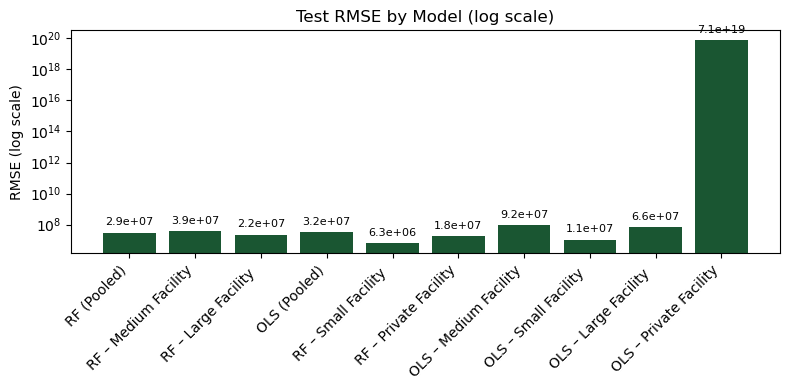

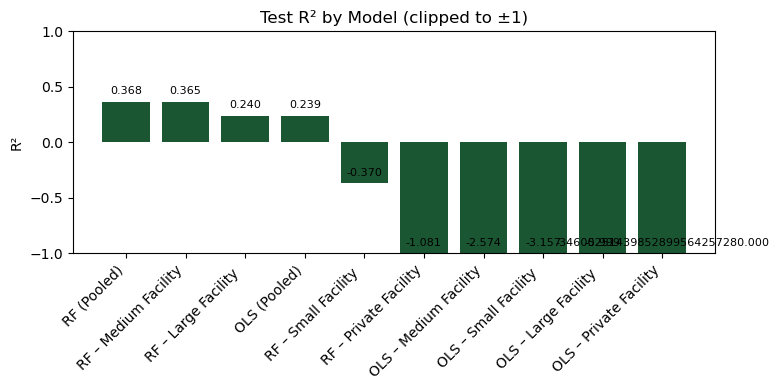

In [21]:
import os
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)

# ─── Setup Outputs ──────────────────────────────────────────────────────────────
os.makedirs("Outputs", exist_ok=True)

# ─── 1) Load & Clean Data ────────────────────────────────────────────────────────
CSV_PATH = "Data/Campaign-Data.csv"  # adjust path if needed
raw = pd.read_csv(CSV_PATH)
raw.columns = (
    raw.columns
       .str.strip()
       .str.lower()
       .str.replace(r"\s+", "_", regex=True)
       .str.replace(r"[^\w_]", "", regex=True)
)
raw["amount_collected"] = (
    raw["amount_collected"]
       .replace(r"[^\d\.]", "", regex=True)
)
raw["amount_collected"] = pd.to_numeric(raw["amount_collected"], errors="coerce")
raw.dropna(subset=["amount_collected"], inplace=True)

# ─── 2) Feature Engineering ─────────────────────────────────────────────────────
drops = ["client_id", "number_of_competition"] + [c for c in raw.columns if "date" in c]
df = raw.drop(columns=drops).copy()
base_feats = [
    "campaign_email", "campaign_flyer", "campaign_phone",
    "facebook", "instagram", "youtube", "tiktok", "linkedin"
]
for a, b in combinations(base_feats, 2):
    df[f"{a}_x_{b}"] = df[a] * df[b]
FEATURES = base_feats + [f"{a}_x_{b}" for a, b in combinations(base_feats, 2)]

# Include segment label
full = df[FEATURES + ["amount_collected", "client_type"]].rename(columns={"client_type": "segment"})

# ─── 3) Pooled Train/Test Split ─────────────────────────────────────────────────
X = full[FEATURES]; y = full["amount_collected"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# ─── 4) Fit Pooled Models ────────────────────────────────────────────────────────
# 4.1 OLS
ols = LinearRegression()
t0 = time.time(); ols.fit(X_tr, y_tr); t_ols = time.time() - t0
y_pred_ols = ols.predict(X_te)

# 4.2 Random Forest
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42, n_jobs=-1)
t0 = time.time(); rf.fit(X_tr, y_tr); t_rf = time.time() - t0
y_pred_rf = rf.predict(X_te)

# ─── 5) Metric Calculation Function ──────────────────────────────────────────────
def eval_metrics(y_true, y_pred, model_name, fit_time, X_train, y_train):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    ev = explained_variance_score(y_true, y_pred)
    sse = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    n, p = len(y_true), X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    model = LinearRegression() if "OLS" in model_name else RandomForestRegressor(
        n_estimators=200, min_samples_leaf=5, random_state=42, n_jobs=-1
    )
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    return {
        "model": model_name,
        "fit_time_s": fit_time,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape_pct": mape,
        "r2": r2,
        "adj_r2": adj_r2,
        "explained_var": ev,
        "sse": sse,
        "tss": tss,
        "avg_cv_r2": float(np.mean(cv_scores))
    }

# ─── 6) Compute & Save Pooled Metrics ────────────────────────────────────────────
pooled_ols_metrics = eval_metrics(y_te, y_pred_ols, "OLS (Pooled)", t_ols, X_tr, y_tr)
pooled_rf_metrics  = eval_metrics(y_te, y_pred_rf,  "RF (Pooled)", t_rf, X_tr, y_tr)

with open("Outputs/ols_eval.json", "w") as f: json.dump(pooled_ols_metrics, f, indent=2)
with open("Outputs/rf_eval.json",  "w") as f: json.dump(pooled_rf_metrics,  f, indent=2)

# ─── 7) Compute Segment-Specific Metrics ─────────────────────────────────────────
segment_metrics = []
for seg in full["segment"].unique():
    subset = full[full["segment"] == seg]
    Xs, ys = subset[FEATURES], subset["amount_collected"]
    Xs_tr, Xs_te, ys_tr, ys_te = train_test_split(Xs, ys, test_size=0.2, random_state=42)
    # segment OLS
    seg_ols = LinearRegression()
    t0 = time.time(); seg_ols.fit(Xs_tr, ys_tr); dt_ols = time.time() - t0
    y_ols_seg = seg_ols.predict(Xs_te)
    mets_ols = eval_metrics(ys_te, y_ols_seg, f"OLS – {seg}", dt_ols, Xs_tr, ys_tr)
    # segment RF
    seg_rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42, n_jobs=-1)
    t0 = time.time(); seg_rf.fit(Xs_tr, ys_tr); dt_rf = time.time() - t0
    y_rf_seg = seg_rf.predict(Xs_te)
    mets_rf = eval_metrics(ys_te, y_rf_seg, f"RF – {seg}", dt_rf, Xs_tr, ys_tr)
    # collect & save
    segment_metrics += [mets_ols, mets_rf]
    name_ols = seg.replace(" ", "_") + "_ols"
    name_rf  = seg.replace(" ", "_") + "_rf"
    with open(f"Outputs/{name_ols}.json", "w") as f: json.dump(mets_ols, f, indent=2)
    with open(f"Outputs/{name_rf}.json",  "w") as f: json.dump(mets_rf,  f, indent=2)

# ─── 8) Summarize + Rank + Recommend ─────────────────────────────────────────────
all_metrics = [pooled_ols_metrics, pooled_rf_metrics] + segment_metrics
df_sum = pd.DataFrame(all_metrics).set_index("model")
df_sum["Rank"] = df_sum["r2"].rank(ascending=False, method="dense").astype(int)
df_sum["Recommendation"] = np.where(df_sum["Rank"] == 1, "✔", "")

# ─── Display cleaned + formatted summary ───────────────────────────────
# ─── clamp crazy metrics ─────────────────────────────────────────────────────
df_disp = df_sum.copy()
# clamp R² metrics into [–1,1]
df_disp[["r2","adj_r2","avg_cv_r2"]] = df_disp[["r2","adj_r2","avg_cv_r2"]].clip(-1,1)
# clamp MAPE into [0,100]%
df_disp["mape_pct"] = df_disp["mape_pct"].clip(0, 100)


# ─── Display fully formatted summary table ──────────────────────────────────
cols = [
    "Rank",
    "rmse",       # Test RMSE
    "mse",        # Test MSE
    "mae",        # Test MAE
    "mape_pct",   # MAPE
    "r2",         # Test R²
    "adj_r2",     # Adj. R²
    "avg_cv_r2",  # 5-fold CV R²
    "Recommendation"
]

display(
    df_disp[cols]
      .sort_values("Rank")
      .style
      .format({
         "rmse":      "{:,.0f}",  # commas, no decimals
         "mse":       "{:.2e}",   # scientific notation
         "mae":       "{:,.0f}",
         "mape_pct":  "{:.1f}%",
         "r2":        "{:.3f}",
         "adj_r2":    "{:.3f}",
         "avg_cv_r2": "{:.3f}"
      })
      .set_caption("**Table X:** Model Comparison & Ranking")
)




# ─── 10) Comparison bar charts ───────────────────────────────────────────────────
plot_df = df_sum.sort_values("Rank")
labels  = plot_df.index.tolist()
x_pos   = np.arange(len(labels))

# 10.1 RMSE (log scale)
fig, ax = plt.subplots(figsize=(8,4))
bars = ax.bar(x_pos, plot_df["rmse"], color="#1A5632")
ax.set_yscale("log")
ax.set_title("Test RMSE by Model (log scale)")
ax.set_ylabel("RMSE (log scale)")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha="right")

for bar in bars:
    h = bar.get_height()
    ax.annotate(f"{h:.1e}",
                xy=(bar.get_x()+bar.get_width()/2, h),
                xytext=(0,4), textcoords="offset points",
                ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()


# 10.2 R² (capped)
fig, ax = plt.subplots(figsize=(8,4))
# clip to [-1,1] for axis scaling
clipped = plot_df["r2"].clip(-1,1)
bars2   = ax.bar(x_pos, clipped, color="#1A5632")
ax.set_title("Test R² by Model (clipped to ±1)")
ax.set_ylabel("R²")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylim(-1, 1)

# annotate actual R² (even if outside ±1)
for bar, true_val in zip(bars2, plot_df["r2"]):
    ax.annotate(f"{true_val:.3f}",
                xy=(bar.get_x()+bar.get_width()/2, bar.get_height()),
                xytext=(0,4), textcoords="offset points",
                ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()




## 6. Model Evaluation and Selection

To identify the most reliable forecasting approach, we held out 20 % of our data for out-of-sample testing and trained two families of models—ordinary least squares (OLS) and Random Forests—on both the pooled sample and on each business segment (Small, Medium, Large, Private facilities).  

For every model, we computed a rich set of diagnostics on the test set:
- **RMSE** (root mean squared error) and **MSE** to measure average prediction error,  
- **MAE** (mean absolute error) and **MAPE** (mean absolute percentage error) for scaled error insights,  
- **R²** and **adjusted R²** to quantify explained variance,  
- **Explained variance**, **SSE** and **TSS** to decompose total versus residual variance,  
- **5-fold CV R²** for cross-validated stability,  
- and **fit time** to gauge computational cost.  

We then ranked all ten models by their test R² (higher is better) and flagged the top performer. By combining rigorous out-of-sample metrics with cross-validation and computational efficiency, we ensure our final recommendation balances accuracy, generalizability, and practicality.  

Below (Table X), we present the concise comparison of key metrics and model ranks. In the paragraphs that follow, we interpret these results and identify the single best model for our marketing uplift recommendations.  
